# Random Forest

**What is a Random Forest?**

- Random Forest is a type **Ensemble** Machine Learning algorithm called Bootstrap Aggregation or bagging.

**How does it work?**

- **Bootstrapping** is a statistical method for estimating a quantity from a data sample, e.g. mean. You take lots of samples of your data, calculate the mean, then average all of your mean values to give you a better estimation of the true mean value. In bagging, the same approach is used for estimating entire statistical models, such as decision trees. Multiple samples of your training data are taken and models are constructed for each sample set. When you need to make a prediction for new data, each model makes a prediction and the **predictions are averaged** to give a better estimate of the true output value.

- Random forest is a tweak on this approach where decision trees are created so that rather than selecting optimal split points, suboptimal splits are made by introducing randomness.  The models created for each sample of the data are therefore more different than they otherwise would be, but still accurate in their unique and different ways. Combining their predictions results in a better estimate of the true underlying output value.



**Pros**

1. Reduction in over-fitting 

2. More accurate than decision trees in most cases

3. Naturally performs feature selection

**Cons**

1. Slow real time prediction

2. Difficult to implement

3. Complex algorithm so difficult to explain

#### Slide Show: https://docs.google.com/presentation/d/1tXxpl8XUzg-nBnlgoE2y-0qR2BMcZJ4o0rCRWxUECUw/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read Iris data from pydatset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Train Validate Test

Now we'll do our train/validate/test split:

- We'll do exploration and train our model on the `train` data

- We tune our model on `validate`, since it will be out-of-sample until we use it.

- And keep the `test` nice and safe and separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.

In [3]:
def train_validate_test_split(df, target, seed=13):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [4]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=13)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

In [5]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
121,5.6,2.8,4.9,2.0
61,5.9,3.0,4.2,1.5
115,6.4,3.2,5.3,2.3
146,6.3,2.5,5.0,1.9
13,4.3,3.0,1.1,0.1


In [6]:
pd.DataFrame(y_train).head()

,species
121,virginica
61,versicolor
115,virginica
146,virginica
13,setosa


## Insert you exploration here

In [7]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Train Model

**Create the object**

Create the Random Forest object with desired hyper-parameters. 



In [8]:
rf = RandomForestClassifier(max_depth=3, random_state=13)

In [9]:
rf

RandomForestClassifier(max_depth=3, random_state=13)

**Fit the model**

Fit the random forest algorithm to the training data. 

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=13)

**Feature Importance**

Evaluate importance, or weight, of each feature. 

In [11]:
print(rf.feature_importances_)

[0.09146534 0.01503648 0.41345955 0.48003862]


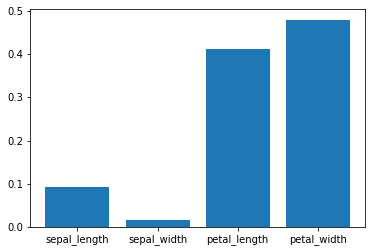

In [12]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

- The higher number the feature importance == more important the feature.
- The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

**Make Predictions**

Classify each flower by its estimated species. 

In [13]:
y_pred = rf.predict(X_train)
y_pred

array(['virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginic

In [14]:
rf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**Estimate Probability**

Estimate the probability of each species, using the training data. 

In [15]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.00000000e+00, 2.85357978e-01, 7.14642022e-01],
       [1.55555556e-03, 9.85092905e-01, 1.33515396e-02],
       [0.00000000e+00, 3.75390161e-02, 9.62460984e-01],
       [0.00000000e+00, 4.90271113e-02, 9.50972889e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.20152066e-02, 9.77984793e-01],
       [0.00000000e+00, 8.15806370e-03, 9.91841936e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.55555556e-03, 9.92116714e-01, 6.32773007e-03],
       [5.55555556e-04, 9.77290833e-01, 2.21536112e-02],
       [0.00000000e+00, 3.82379408e-02, 9.61762059e-01],
       [1.55555556e-03, 9.92116714e-01, 6.32773007e-03],
       [1.55555556e-03, 9.87816128e-01, 1.06283166e-02],
       [1.55555556e-03, 9.92116714e-01, 6.32773007e-03],
       [1.00000000e+00, 0.00000

## Evaluate Model

**Compute the Accuracy**

In [16]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.99


**Create a confusion matrix**

In [17]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[28  0  0]
 [ 0 27  1]
 [ 0  0 28]]


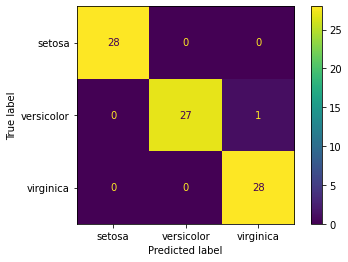

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

**Create a classificaiton report**


**Precision:** $\frac{TP}{(TP + FP)}$

**Recall:** $\frac{TP}{(TP + FN)}$

**F1-Score:** A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.  

F1 $\in [0, 1]$

F1-score = harmonic mean = $\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

**Support:** number of occurrences of each class. 

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.96      0.98        28
   virginica       0.97      1.00      0.98        28

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



## Validate Model

**Evaluate on Out-of-Sample data**

Compute the accuracy of the model when run on the validate dataset. 

In [20]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.92


## Exercises

Continue working in your `model` file with titanic data to do the following: 

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

1. Evaluate your results using the model score, confusion matrix, and classification report.

1. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

1. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

1. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?